In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPool1D
from keras.layers import Flatten
from keras.utils import to_categorical

from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import History
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

Using TensorFlow backend.


In [2]:
data = np.load("dataset.npy", allow_pickle=True).item()
xs = data["genes"] 
ys = data["resistant"] 

In [3]:
df=pd.DataFrame({"Gene":xs, "Resistance":ys})

In [4]:
char_to_int={"A": 0, "C": 1, "G":2, "T":3, "Q":4} 
def geneint(word):
    return np.array([char_to_int[char] for char in word])

In [5]:
df["Gene_padded"]=df.Gene.apply(lambda x : x.ljust(906,"Q"))

In [6]:
gene_int=df.Gene_padded.apply(geneint)
resistance_int=to_categorical(df.Resistance)
x_input=np.stack(gene_int.values)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_input.reshape(100000,906,1), np.asarray(resistance_int).reshape(100000,2), test_size=0.2, shuffle= True)


In [ ]:
### WITH DROPOUT
model1 = Sequential()
model1.add(Conv1D(filters=5, kernel_size=3, activation="relu", input_shape=(906,1)))
model1.add(MaxPool1D(pool_size=2))
model1.add(Conv1D(filters=10, kernel_size=3, activation="relu", input_shape=(906,1)))
model1.add(MaxPool1D(pool_size=2))
model1.add(Flatten())
model1.add(Dropout(0.3))
model1.add(Dense(32, activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(2, activation="softmax"))
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [60]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 904, 5)            20        
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 452, 5)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 450, 10)           160       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 225, 10)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2250)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 2250)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                72032     
__________

In [61]:
early=EarlyStopping(patience=3)
history1=model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, callbacks=[early])

Train on 80000 samples, validate on 20000 samples
Epoch 1/30
80000/80000 [==============================] - 89s 1ms/step - loss: 0.3611 - acc: 0.7467 - val_loss: 0.3471 - val_acc: 0.7510
Epoch 2/30
80000/80000 [==============================] - 76s 950us/step - loss: 0.3469 - acc: 0.7505 - val_loss: 0.3471 - val_acc: 0.7510
Epoch 3/30
80000/80000 [==============================] - 81s 1ms/step - loss: 0.3468 - acc: 0.7499 - val_loss: 0.3471 - val_acc: 0.7510
Epoch 4/30
80000/80000 [==============================] - 66s 825us/step - loss: 0.3468 - acc: 0.7484 - val_loss: 0.3471 - val_acc: 0.7483
Epoch 5/30
80000/80000 [==============================] - 42s 525us/step - loss: 0.3466 - acc: 0.7499 - val_loss: 0.3471 - val_acc: 0.7510


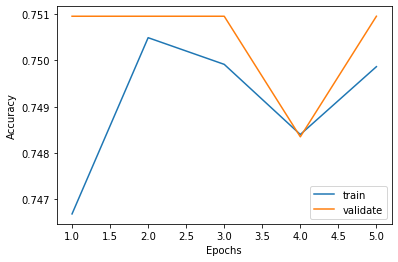

In [65]:
plt.plot(range(1,6),history1.history["acc"], label="train")
plt.plot(range(1,6),history1.history["val_acc"], label="validate")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()model.fit(x_train, y_train, validation_data=(x_test, y_test)

In [49]:
model.save("CNN_Drop_noCV.h5")

In [63]:
###WITHOUT DROPOUT
model2 = Sequential()
model2.add(Conv1D(filters=5, kernel_size=3, activation="relu", input_shape=(906,1)))
model2.add(MaxPool1D(pool_size=2))
model2.add(Conv1D(filters=10, kernel_size=3, activation="relu", input_shape=(906,1)))
model2.add(MaxPool1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(32, activation="relu"))
model2.add(Dense(2, activation="softmax"))
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



In [ ]:
early=EarlyStopping(patience=3)
history2=model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, callbacks=[early])

In [68]:
print(history2.history["val_acc"])

[0.84575, 0.9445, 0.9678, 0.9662, 0.97915, 0.9846, 0.99035, 0.9918, 0.9933, 0.99485, 0.90835, 0.99455, 0.99495, 0.99595, 0.99435, 0.993, 0.9957, 0.9951, 0.99535, 0.991, 0.9858, 0.99455]


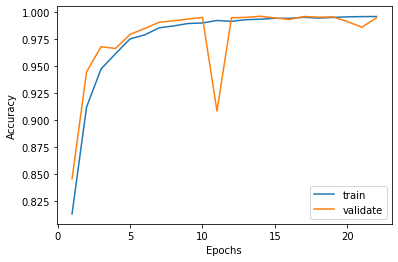

In [67]:
plt.plot(range(1,23),history2.history["acc"], label="train")
plt.plot(range(1,23),history2.history["val_acc"], label="validate")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

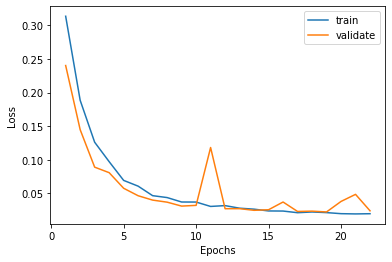

In [69]:
plt.plot(range(1,23),history2.history["loss"], label="train")
plt.plot(range(1,23),history2.history["val_loss"], label="validate")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [71]:
model2.save("CNN_noDrop_noCV.h5")

In [70]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 904, 5)            20        
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 452, 5)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 450, 10)           160       
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 225, 10)           0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2250)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                72032     
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 66        
Total para

In [24]:
### RNN 
small_df=df.sample(frac=0.2)
small_gene_int=small_df.Gene_padded.apply(geneint)
small_resistance_int=to_categorical(small_df.Resistance)
small_x_input=np.stack(small_gene_int.values)
sx_train, sx_test, sy_train, sy_test = train_test_split(small_x_input.reshape(20000,906,1), np.asarray(small_resistance_int).reshape(20000,2), test_size=0.2, shuffle= True)


In [25]:
model3 = Sequential()
model3.add(LSTM(32, batch_input_shape=(None, 906, 1), return_sequences=True))
model3.add(LSTM(32, batch_input_shape=(None, 906, 1), return_sequences=True)) 
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(2, activation="softmax"))
model3.compile("adam", "binary_crossentropy", metrics=["accuracy"])


In [38]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 906, 32)           4352      
_________________________________________________________________
lstm_6 (LSTM)                (None, 906, 32)           8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 906, 32)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 28992)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 57986     
Total params: 70,658
Trainable params: 70,658
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit(sx_train, sy_train, epochs=20, verbose = 1)

In [30]:
scores=model3.evaluate(sx_test, sy_test)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

4000/4000 [==============================] - 43s 11ms/step
acc: 88.55%


In [ ]:
model3.save("RNN.h5")

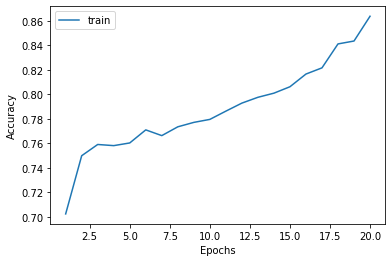

In [37]:
plt.plot(range(1,21),model3.history.history['acc'], label='train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()